In [2]:
import os
import pandas as pd
import json
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, f1_score

In [3]:
data = pd.read_csv(os.path.join(".", 'alzheimers_disease_data.csv'))
data = data.drop(columns=['DoctorInCharge'])

In [4]:
# Normalize features
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data.drop(columns=['Diagnosis']))

# Separate features and targets
X = data.drop(columns=['Diagnosis'])
y = data['Diagnosis']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, stratify=y_encoded, random_state=42)

results = {}

In [5]:
# List of models
models = {
  "CART": DecisionTreeClassifier(),
  "C4.5": DecisionTreeClassifier(criterion='gini'),
  "AdaBoost": AdaBoostClassifier(algorithm='SAMME'),
  "XGBoost": xgb.XGBClassifier(eval_metric='logloss'),
  "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
  "LightGBM":lgb.LGBMClassifier(max_depth=6, min_gain_to_split=0.1),
  "ExtraTrees": ExtraTreesClassifier(),
  "GradientBoosting": GradientBoostingClassifier()
}

In [6]:
# Train models and store results
for model_name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  results[model_name] = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred, pos_label=1),
    "Precision": precision_score(y_test, y_pred, pos_label=1),
    "F1 Score": f1_score(y_test, y_pred, pos_label=1),
    "Classification Report": classification_report(y_test, y_pred, output_dict=True)
  }

c:\Users\mohammad-hossein\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


[LightGBM] [Warning] min_gain_to_split is set=0.1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.1
[LightGBM] [Warning] min_gain_to_split is set=0.1, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=0.1
[LightGBM] [Info] Number of positive: 532, number of negative: 972
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000256 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3537
[LightGBM] [Info] Number of data points in the train set: 1504, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353723 -> initscore=-0.602712
[LightGBM] [Info] Start training from score -0.602712
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

In [7]:
with open("model_results.json", "w") as f:
  json.dump(results, f, indent=4)

In [8]:
# Create and save a comparison table to Excel
results_df = pd.DataFrame({
  "model": list(results.keys()),
  "Accuracy": [res["Accuracy"] for res in results.values()],
  "Recall": [res["Recall"] for res in results.values()],
  "Precision": [res["Precision"] for res in results.values()],
  "F1 Score": [res["F1 Score"] for res in results.values()]
})
results_df.to_excel("comparison_results.xlsx", index=False)

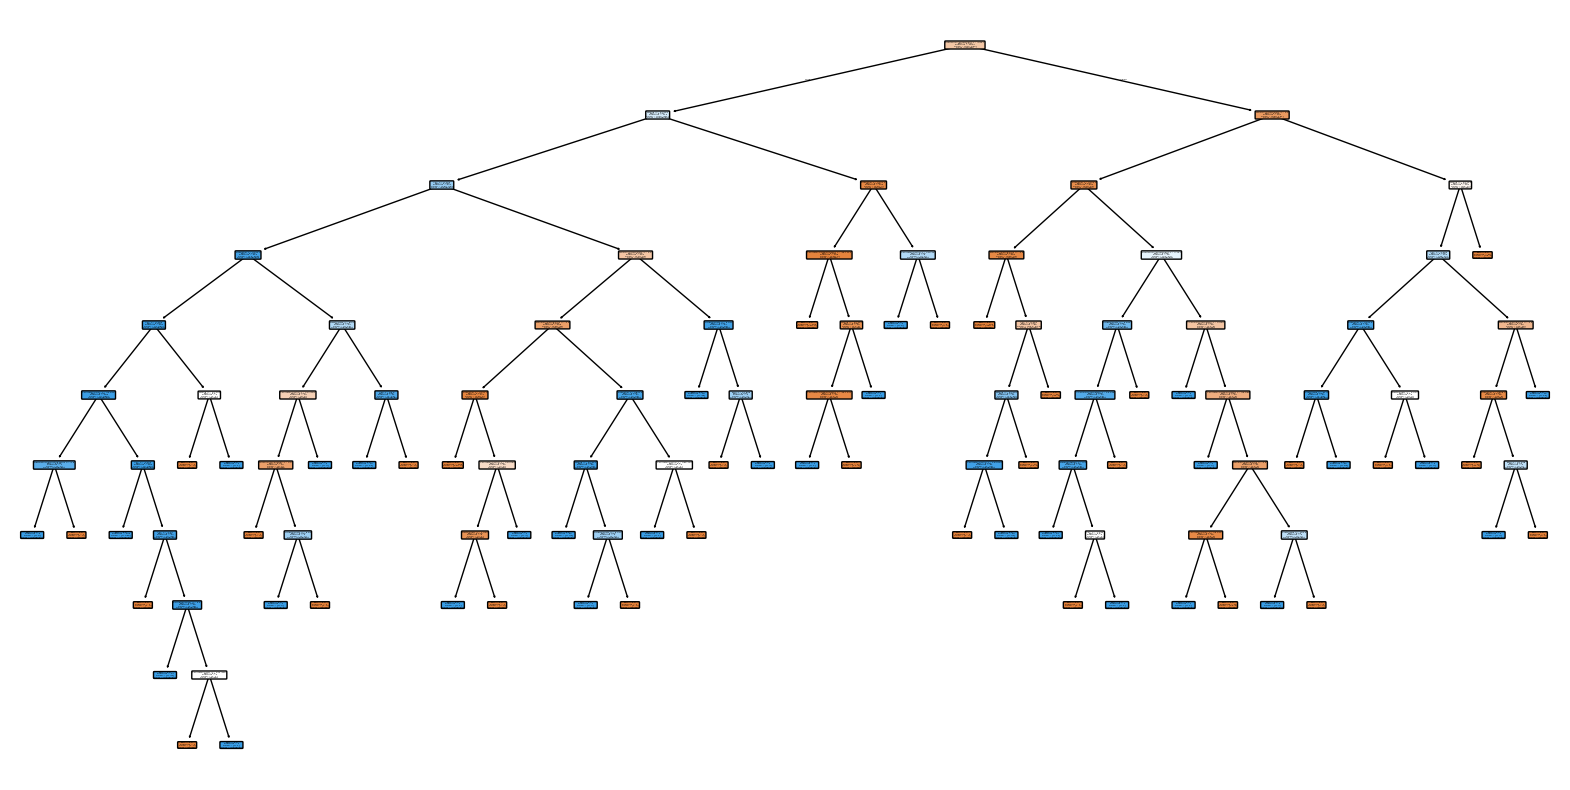

In [8]:
# Visualize decision trees
# Display and save the chart for the CART model
plt.figure(figsize=(20, 10))
plot_tree(models["CART"], feature_names=X.columns, class_names=["benign", "malignant"], filled=True, rounded=True)
plt.savefig("cart_tree_visualization.svg", format="svg")
# plt.show()

# Save decision tree rules to text files for tree-based models
# Save CART model decision tree rules
cart_rules = export_text(models["CART"], feature_names=list(X.columns))
with open("cart_tree_rules.txt", "w") as f:
    f.write(cart_rules)

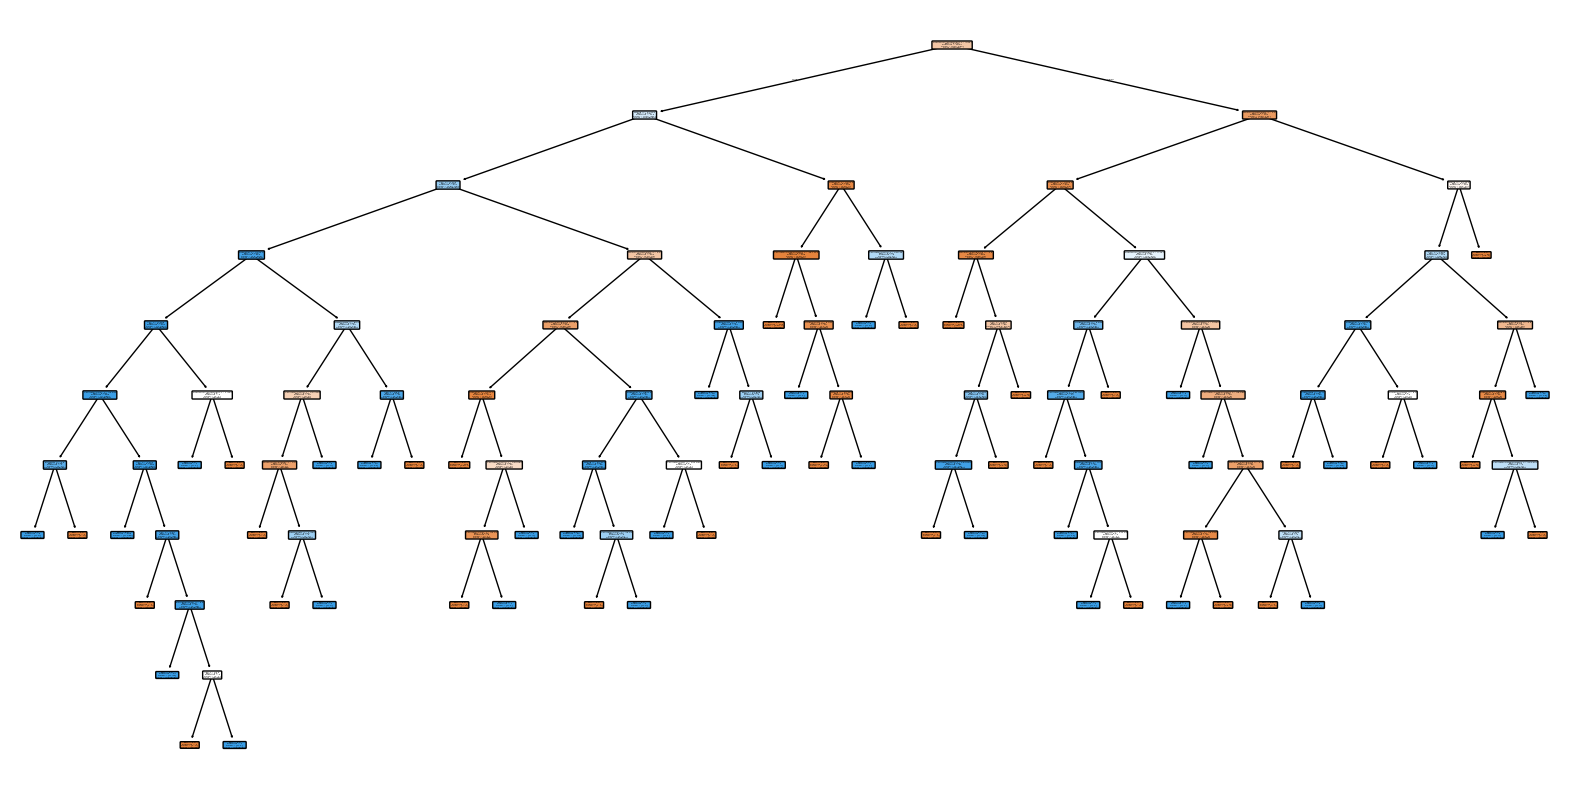

In [9]:
# Display and save the chart for the C4.5 model
# Assumes C4.5 is similar to a decision tree and visualizes it in the same way
plt.figure(figsize=(20, 10))
plot_tree(models["C4.5"], feature_names=X.columns, class_names=["benign", "malignant"], filled=True, rounded=True)
plt.savefig("c45_tree_visualization.svg", format="svg")
# plt.show()

# Save C4.5 model decision tree rules
c45_rules = export_text(models["C4.5"], feature_names=list(X.columns))
with open("c45_tree_rules.txt", "w") as f:
    f.write(c45_rules)

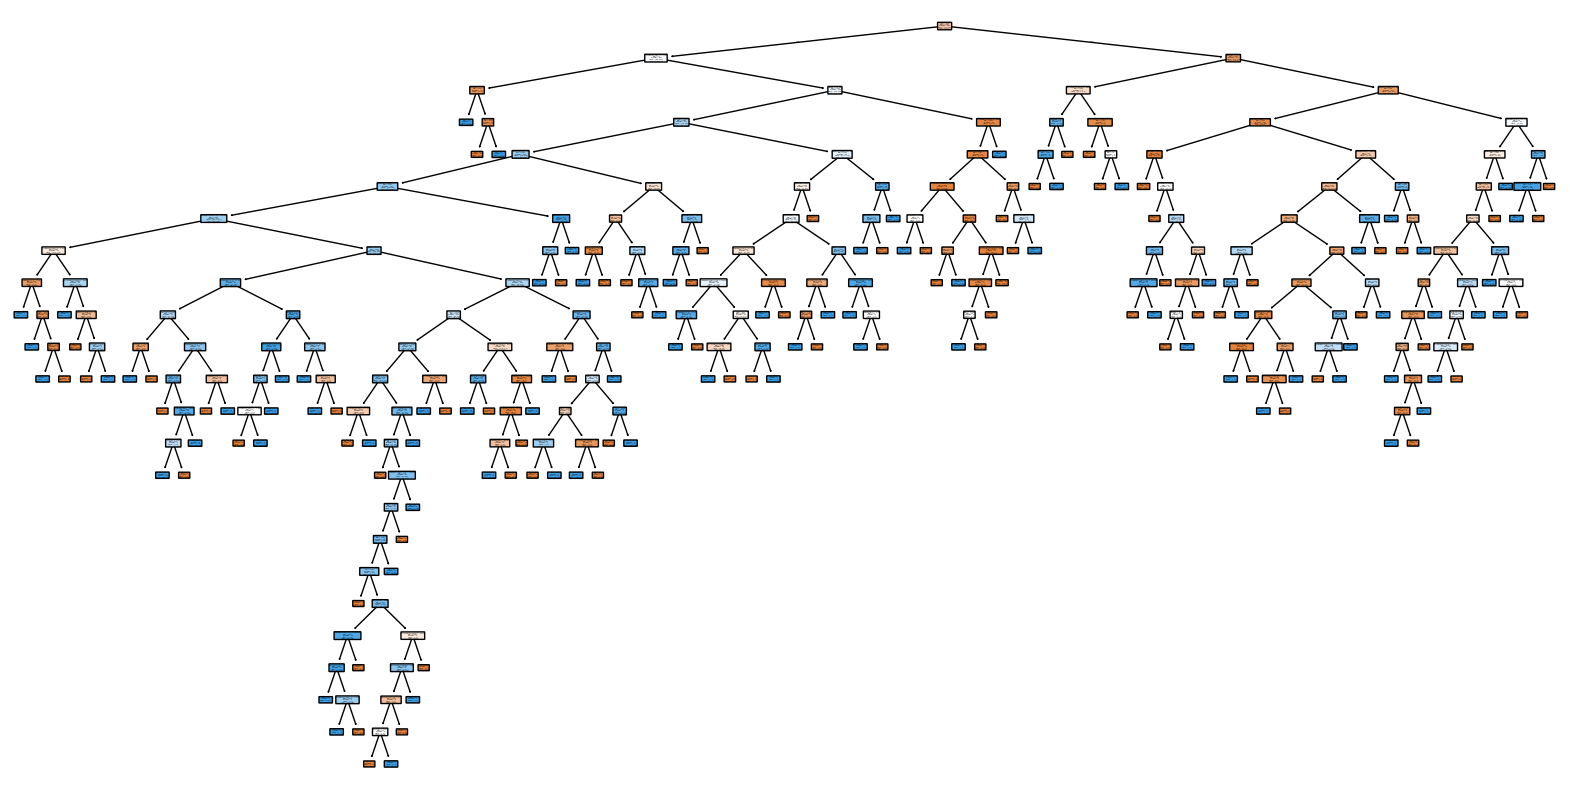

In [10]:
# Display and save the chart for the RandomForest model
# Visualize one random tree from the RandomForest
plt.figure(figsize=(20, 10))
plot_tree(models["RandomForest"].estimators_[0], feature_names=X.columns, class_names=["benign", "malignant"], filled=True, rounded=True)
plt.savefig("random_forest_tree_visualization.svg", format="svg")
# plt.show()

# Save decision rules for the first tree in the RandomForest model
random_forest_rules = export_text(models["RandomForest"].estimators_[0], feature_names=list(X.columns))
with open("random_forest_tree_rules.txt", "w") as f:
    f.write(random_forest_rules)

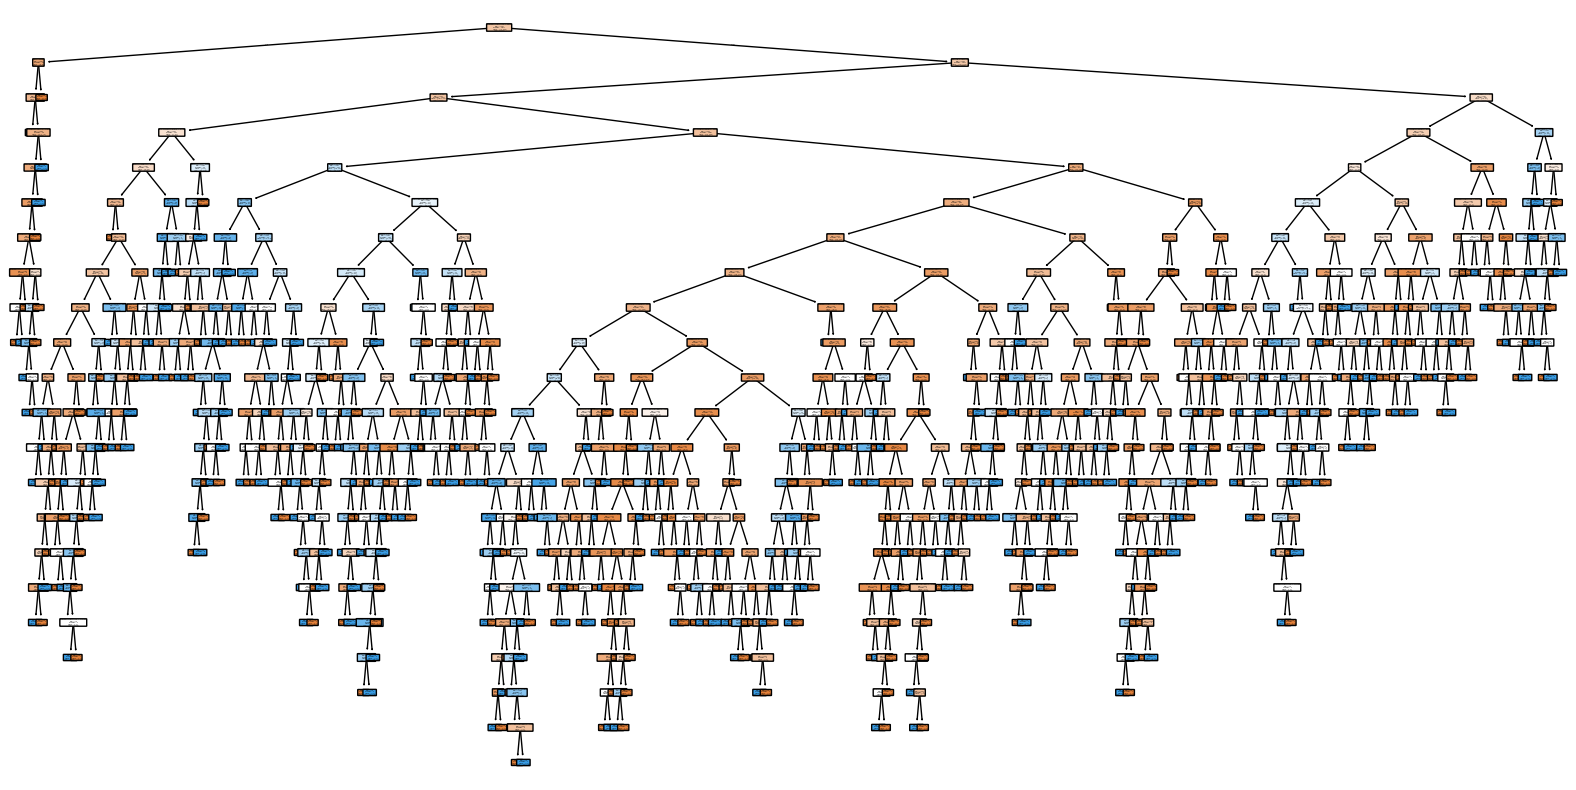

In [11]:
# Display and save the chart for the ExtraTrees model
# Visualize one random tree from the ExtraTrees
plt.figure(figsize=(20, 10))
plot_tree(models["ExtraTrees"].estimators_[0], feature_names=X.columns, class_names=["benign", "malignant"], filled=True, rounded=True)
plt.savefig("extra_trees_tree_visualization.svg", format="svg")
# plt.show()

# Save decision rules for the first tree in the ExtraTrees model
extra_trees_rules = export_text(models["ExtraTrees"].estimators_[0], feature_names=list(X.columns))
with open("extra_trees_tree_rules.txt", "w") as f:
    f.write(extra_trees_rules)

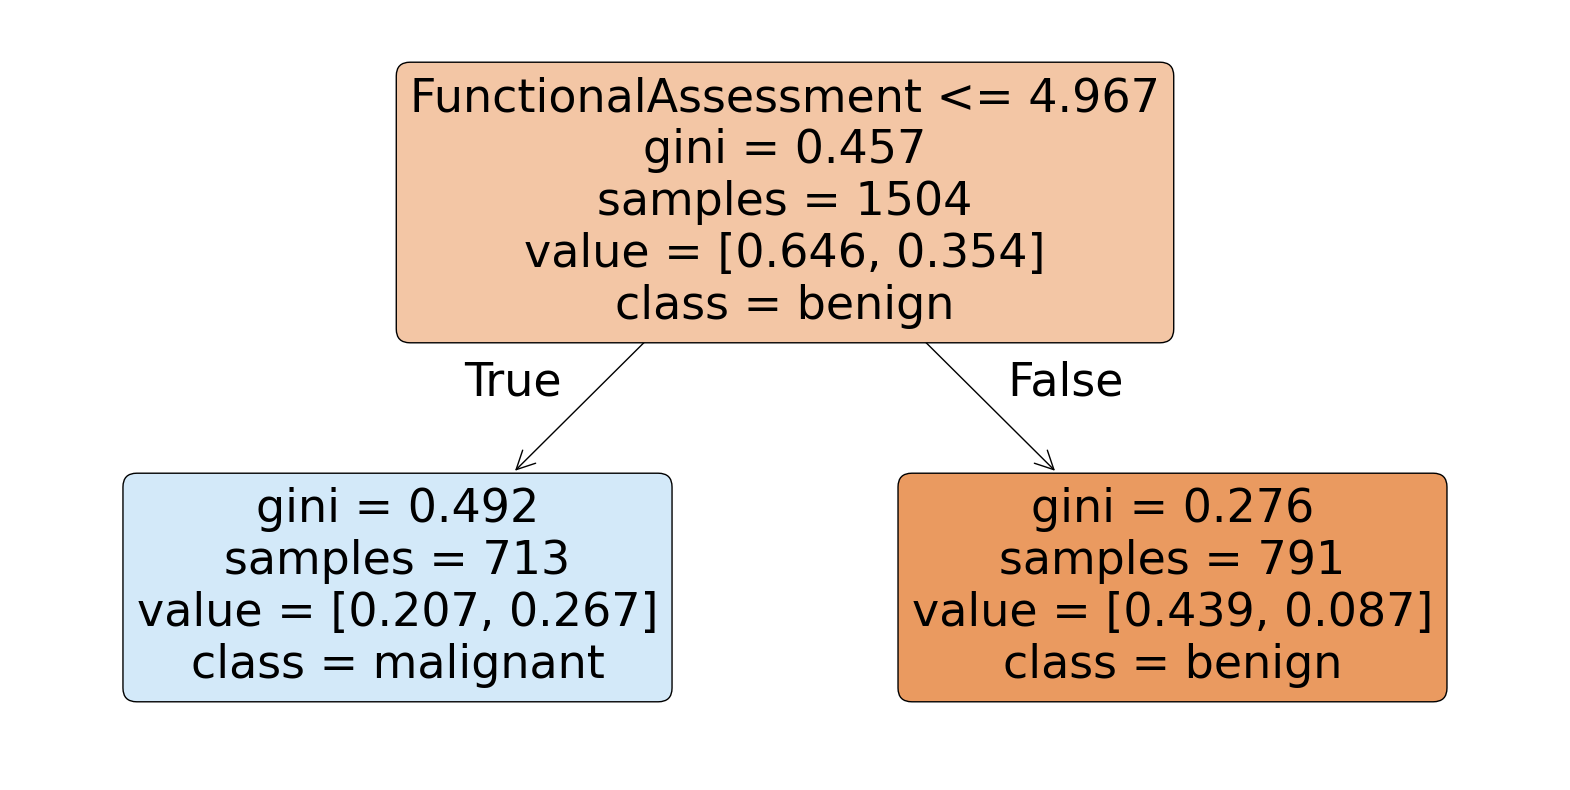

In [12]:
# Display and save the chart for the AdaBoost model
# In AdaBoost, weak decision trees are used
# Visualize one tree from AdaBoost
plt.figure(figsize=(20, 10))
plot_tree(models["AdaBoost"].estimators_[0], feature_names=X.columns, class_names=["benign", "malignant"], filled=True, rounded=True)
plt.savefig("adaboost_tree_visualization.svg", format="svg")
# plt.show()

# Save decision rules for the first tree in the AdaBoost model
adaboost_rules = export_text(models["AdaBoost"].estimators_[0], feature_names=list(X.columns))
with open("adaboost_tree_rules.txt", "w") as f:
    f.write(adaboost_rules)

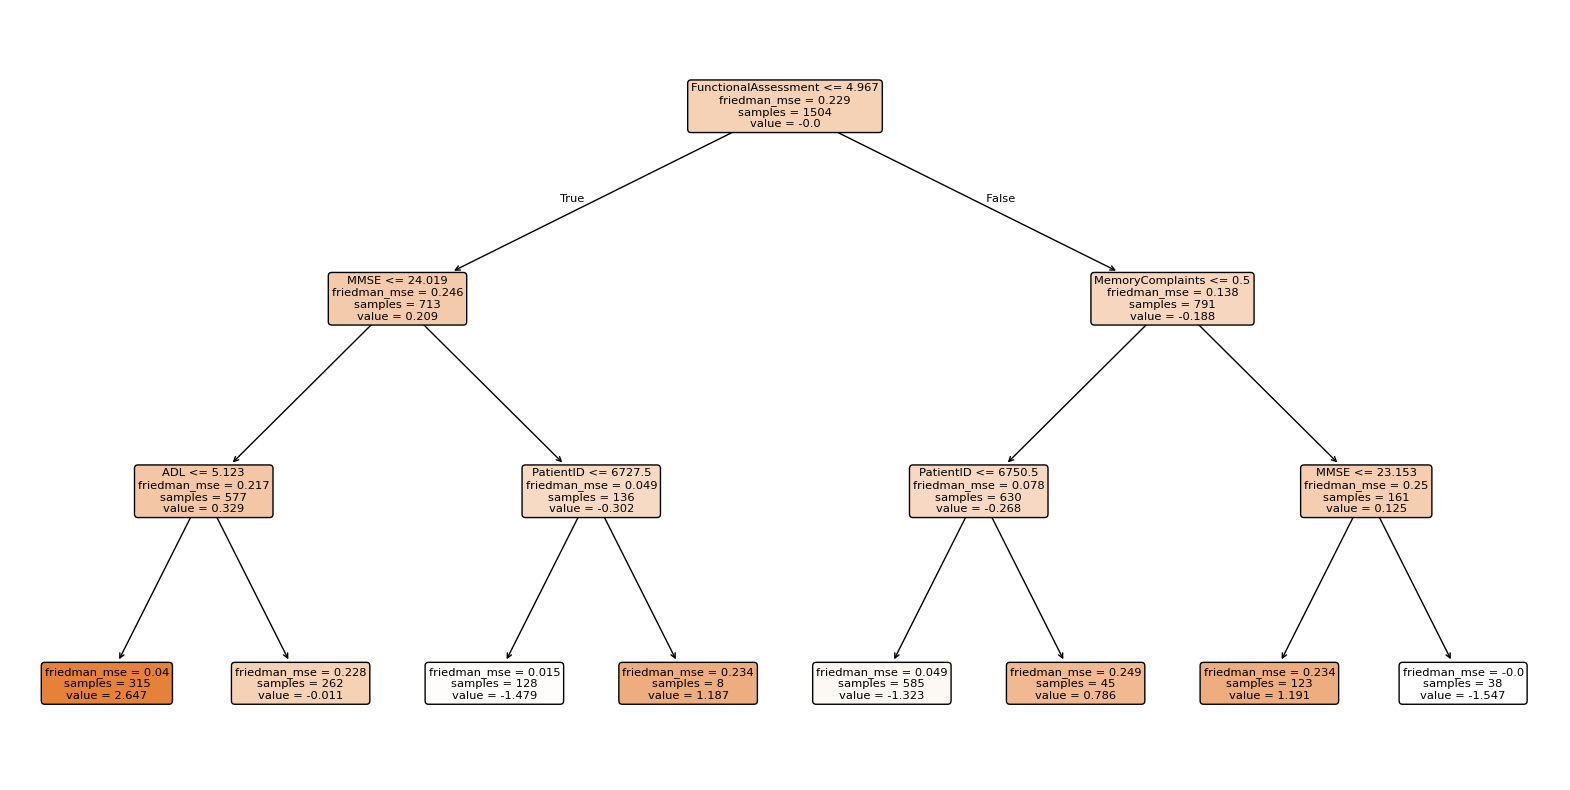

In [14]:
# Display and save the chart for the Gradient Boosting model
# In GradientBoosting, weak trees similar to AdaBoost are used
plt.figure(figsize=(20, 10))
plot_tree(models["GradientBoosting"].estimators_[0, 0],  # Use the first tree in the estimators_ set
          feature_names=X.columns, 
          filled=True, 
          rounded=True)
plt.savefig("gradient_boosting_tree_visualization.svg", format="svg")
# plt.show()

# Save decision rules for the first tree in the Gradient Boosting model
gradient_boosting_rules = export_text(models["GradientBoosting"].estimators_[0, 0], feature_names=list(X.columns))
with open("gradient_boosting_tree_rules.txt", "w") as f:
    f.write(gradient_boosting_rules)

<Figure size 2000x1000 with 0 Axes>

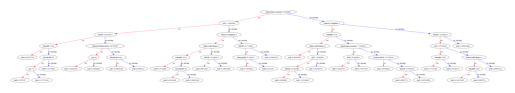

In [12]:
# Display and save the chart for the XGBoost model
# XGBoost is not a decision tree; use its dedicated tool for visualization
plt.figure(figsize=(20, 10))
xgb.plot_tree(models["XGBoost"], num_trees=0)
plt.savefig("xgboost_tree_visualization.svg", format="svg")
# plt.show()

<Figure size 2000x1000 with 0 Axes>

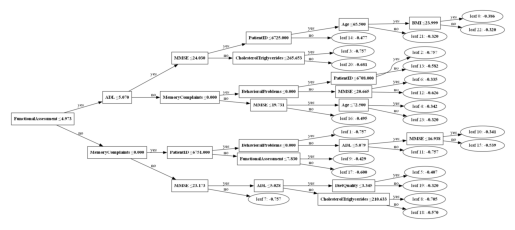

In [13]:
# Display and save the chart for the LightGBM model
# LightGBM is similar to XGBoost; use the same tool for tree visualization
plt.figure(figsize=(20, 10))
lgb.plot_tree(models["LightGBM"], tree_index=0)
plt.savefig("lgbm_tree_visualization.svg", format="svg")
# plt.show()